# Importing libraries

In [4]:
import cv2
from os import listdir
from os.path import isfile, join
import requests
import imutils
from PIL import Image
from skimage.metrics import structural_similarity

# Getting images

In [5]:
original = Image.open('./images/file_1.JPG')
fake = Image.open('./images/file_2.JPG')

In [6]:
print(f'Original image size: {original.size}')
print(f'Fake image size: {fake.size}')
print()
print(f'Original image frmat: {original.format}')
print(f'Fake image size: {fake.format}')


Original image size: (681, 655)
Fake image size: (352, 341)

Original image frmat: JPEG
Fake image size: JPEG


In [11]:
def reformatting(img, size, path, format): 
  counter = 0
  img_list = []
  for i in img: 
    i = i.resize((250, 160))
    i.save(f'{path}file_{counter}.{format}')
    img_list.append(i)
    counter+=1
  return img_list

In [12]:
path = './images/'
format = 'png'
size = (250, 160)

In [13]:
original, fake = reformatting([original, fake], (250, 160), path, format)

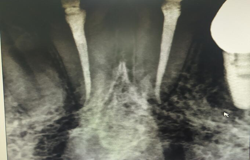

In [14]:
original

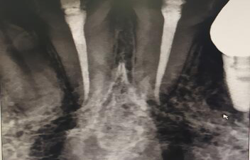

In [15]:
fake

# Reading images in opencv

In [16]:
original = cv2.imread(f'{path}file_{0}.{format}')
fake = cv2.imread(f'{path}file_{1}.{format}')

In [17]:
# converting images to grey scale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)

In [18]:
# Computing Structural Similarity Index
(score, diff) = structural_similarity(original_gray, fake_gray, full=True)
diff = (diff * 255).astype('uint8')
print(f'SSM: {score}')

SSM: 0.6684029839061242


Similarity is as low as 31.679%

In [19]:
# threshold and contours calculation
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

In [20]:
# adding bounding rectangles
for c in contours: 
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x,y), (x+w, y+h), (0, 0, 255), 2)
  cv2.rectangle(fake, (x,y), (x+w, y+h), (0, 0, 255), 2)

Original Image


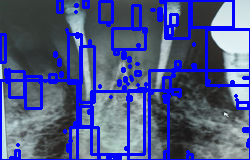

In [21]:
print('Original Image')
Image.fromarray(original)

Fake Image


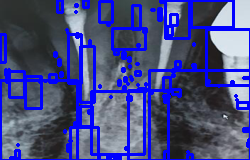

In [22]:
print('Fake Image')
Image.fromarray(fake)

Different image


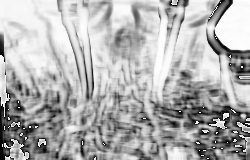

In [23]:
# visualizing differences with black
print('Different image')
Image.fromarray(diff)

Threshold image


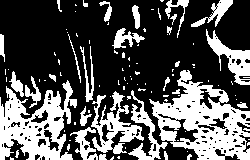

In [24]:
# visualize threshold with white
print('Threshold image')
Image.fromarray(thresh)

The second image differs a lot from the first one. Can be used to identify fake pictures of documents or identify differences in x-ray images. 